In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.constants as c
import scipy.optimize as opt

import axion_mass
from config import model
import g_star
import time_temp

In [2]:
def hubble_parameter_in_rad_epoch(T, g_model):
    """
    Compute Hubble parameter in the radiation dominated epoch using the
    Friedmann equation 3 H^2 M_pl^2 = rho = pi^2 / 30 * g_* T^4
    from the temperature T in eV
    """
    rho = np.pi**2 / 30 * g_model.g_rho(T) * T**4
    H = np.sqrt(rho / (3 * model.M_pl**2))
    return H

In [3]:
def axion_eom_rhs(T, y, f_a, g_model, m_a_fn):
    """
    Computes the rhs of the eom of the axion field as a function of the temperature,
    given the temperature in eV, y = [theta(T), dtheta/dT(T)], g_model is a GStarModel,
    m_a_fn : T x f_a -> m_a [eV]
    """
    theta, dthetadT = y
    H = hubble_parameter_in_rad_epoch(T, g_model)
    dtdT = time_temp.dtdT(T, g_model)
    d2tdT2 = time_temp.d2tdT2(T, g_model)
    dtheta2d2T = - (3*H*dtdT - d2tdT2 / dtdT) * dthetadT - m_a_fn(f_a, T)**2 * dtdT**2 * np.sin(theta)
    return dthetadT, dtheta2d2T

In [4]:
# y is the state vector
theta_i = 1e-5
initial_y = (theta_i, 0)
f_a = 1e12
T_range = ()

In [5]:
np.sqrt(axion_mass.m_a_at_abs_zero_from_shellard(1e12 * 1e9))

0.0024096677033343524

In [15]:
# N H(T) = m_a(T) ===> root of N H(T) - m_a(T)
def find_T_osc(m_a_fn, f_a, g_model, N=3):
    # T_init_guess = (30 / np.pi**2 * axion_mass.m_a_at_abs_zero_from_shellard(f_a) / N) ** (1 / 4) # g = 1
    T_init_guess = 1e9
    # print(T_init_guess)
    sol = opt.root(lambda T_guess: N * hubble_parameter_in_rad_epoch(T_guess, g_model) - m_a_fn(T_guess, f_a), T_init_guess)
    # assert sol.success, "%f MeV" % (sol.x / 1e6)
    T_osc = sol.x
    return T_osc

In [29]:
def plot_T_osc(m_a_model, label):
    g_model = g_star.borsamyi_table
    f_a = np.logspace(9, 18, 400) * 1e9 # eV
    # f_a = np.logspace(-18, 18, 400) * 1e9 # eV
    T_osc = np.array(list(map(lambda f_a: find_T_osc(m_a_model, f_a, g_model), f_a)))
    plt.loglog(f_a / 1e9, T_osc / 1e6, label=label)
    plt.xlabel(r"$f_a [\mathrm{GeV}]$", fontsize=16)
    plt.ylabel(r"$T_\mathrm{osc} [\mathrm{MeV}]$", fontsize=16)

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in power
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d


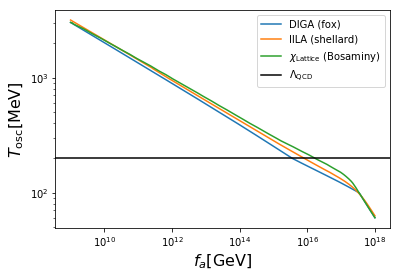

In [35]:
plot_T_osc(axion_mass.m_a_fox, "DIGA (fox)")
plot_T_osc(axion_mass.m_a_shellard, "IILA (shellard)")
plot_T_osc(axion_mass.m_a_from_chi_general, r"$\chi_\mathrm{Lattice}$ (Bosaminy)")
plt.axhline(model.Lambda_QCD / 1e6, color="black", label=r"$\Lambda_\mathrm{QCD}$")
plt.legend()